# Linear regression [9 pts]

In this homework, you will implement solution algorithms for linear regression.


## Import libraries
Let's begin by importing some libraries. 

In [1]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

Automatically created module for IPython interactive environment


## Load dataset

Now, we are importing a dataset of diabetes. You can check the details on this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset. 

The dataset consists of 442 observations with 10 attributes ($X$) that may affect the progression of diabetes ($y$). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n$ = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('The shape of the input features:',diabetes_X.shape)
print('The shape of the output varaible:',diabetes_y.shape)

The shape of the input features: (442, 10)
The shape of the output varaible: (442,)


We will choose just one attribute from the ten attributes as an input variable.

In [3]:
# Use only one feature
diabetes_X_one = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_one.shape)

(442, 1)


## Dataset split

Now, we split the dataset into two parts: training set and test set. 

- training set: 422 samples
- test set: 20 samples 

In [4]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_one[:-20]
diabetes_X_test = diabetes_X_one[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('Training input variable shape:', diabetes_X_train.shape)
print('Test input variable shape:', diabetes_X_test.shape)

Training input variable shape: (422, 1)
Test input variable shape: (20, 1)


## Linear regression 

Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks: 

- [3pts] implement {your own version} of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, )
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[IMPORTANT] Do not just call the least square function from libraries, for example, 
scipy.optimize.least_squares from scipy. Doing so will result in 0 point. Using helping functions such as numpy.linalg.inv is okay. 

- [3pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[NOTE] Notice that the loss function is mean-squared error. 

- [3pts] derive the analytical expression of the gradient if the loss is defined as 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

In [5]:
def method_of_least_square(diabetes_X_train, diabetes_y_train):
    X = np.c_[np.ones(diabetes_X_train.shape), np.array(diabetes_X_train)]
    X_T = np.transpose(X)
    y = np.array(diabetes_y_train)

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X_T, X)), X_T), y)
    return theta

least_squares_theta_ = method_of_least_square(diabetes_X_train, diabetes_y_train)
print("METHOD OF LEAST SQUARES: Theta =", least_squares_theta_)

METHOD OF LEAST SQUARES: Theta = [152.91886183 938.23786125]


Starting Theta = [13, 10]
Iteration = 0 	MSE = 18512.639213024086 	Theta = [41.07156603825645, 10.433702612667766]
Iteration = 1000 	MSE = 4742.727255798539 	Theta = [153.19839938392184, 348.46935131796965]
Iteration = 2000 	MSE = 4273.340848444981 	Theta = [153.0965630198055, 563.3237744696855]
Iteration = 3000 	MSE = 4083.6567756610807 	Theta = [153.0318259461728, 699.9060919217072]
Iteration = 4000 	MSE = 4007.0034109615185 	Theta = [152.9906727811035, 786.7310646959106]
Iteration = 5000 	MSE = 3976.02696558301 	Theta = [152.96451183652908, 841.9254415221018]
Iteration = 6000 	MSE = 3963.5090523505123 	Theta = [152.94788140191062, 877.0123426277763]
Iteration = 7000 	MSE = 3958.450429587909 	Theta = [152.9373094841111, 899.3169812520372]
Iteration = 8000 	MSE = 3956.406185968464 	Theta = [152.93058894742498, 913.495973653232]
Iteration = 9000 	MSE = 3955.580085234773 	Theta = [152.92631672225198, 922.5095169300332]
Iteration = 10000 	MSE = 3955.2462490834882 	Theta = [152.9236008814

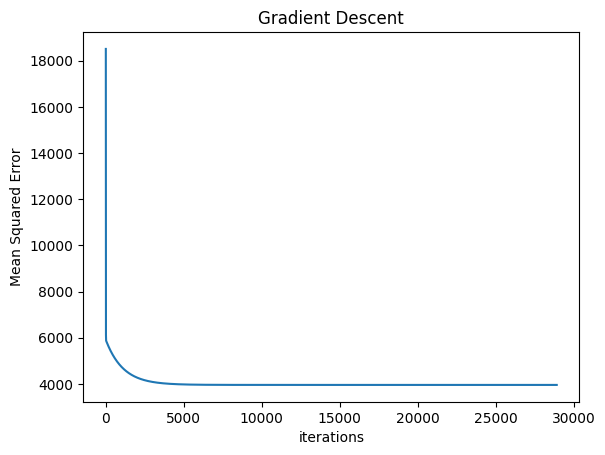

In [6]:
def mean_squared_error(x, y, theta):
    N = len(x)
    
    mse = 0
    for i in range(N):
        mse = mse + (y[i] - (theta[0][0] + theta[1][0] * x[i]))**2
    mse = 1/N * mse
    
    return mse[0]

def get_printable_theta(theta):
    return [theta[0][0], theta[1][0]]

def gradient_descent(diabetes_X_train, diabetes_y_train, step_size = 0.1, iterations = 30000):
    import sys
    np.random.seed()
    x_ = np.array(diabetes_X_train)
    x = np.c_[np.ones(diabetes_X_train.shape), np.array(diabetes_X_train)]
    y = np.array(diabetes_y_train).reshape(x.shape[0], 1)
    N = len(x)

    mse_array = []

    cost = sys.float_info.max
    theta = np.random.randint(100, size=2).reshape(2, 1)

    print("Starting Theta =", get_printable_theta(theta))

    for k in range(iterations):
        temp = -2 * np.dot(np.transpose(x), y - np.dot(x, theta))
        theta_k = theta
        theta_k_1 = np.subtract(theta_k, step_size * 1/N * temp)
        mse = mean_squared_error(x_, y, theta_k_1)

        mse_array.append(mse)

        if mse >= cost:
            theta = theta_k
            break
        else:
            theta = theta_k_1
            cost = mse
        
        if k % 1000 == 0:
            print("Iteration =", k, "\tMSE =", cost, "\tTheta =", get_printable_theta(theta))
    
    print("Iteration =", k, "\tMSE =", cost, "\tTheta =", get_printable_theta(theta))
    print("Finished Gradient Descent")
    theta = get_printable_theta(theta)
    return theta, mse_array


gradient_descent_theta_, mse_array = gradient_descent(diabetes_X_train, diabetes_y_train)
print("GRADIENT DESCENT: Theta =", gradient_descent_theta_)

plt.plot(np.array([i for i in range(len(mse_array))]), np.array(mse_array))
plt.xlabel("iterations")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent")
plt.show()

In [7]:
def sklearn_linear_regression(x, y):
    from sklearn.linear_model import LinearRegression

    linear_regression = LinearRegression()
    linear_regression.fit(x, y)

    theta = np.concatenate((np.array([linear_regression.intercept_]), linear_regression.coef_), axis = 0)

    return theta

sklearn_linear_regression_theta_ = sklearn_linear_regression(diabetes_X_train, diabetes_y_train)
print("SKLEARN LINEAR REGRESSION: Theta =", sklearn_linear_regression_theta_)

SKLEARN LINEAR REGRESSION: Theta = [152.91886183 938.23786125]


In [8]:
print("***** Sklearn Linear Regression *****")
print("Theta =", sklearn_linear_regression_theta_, end="\n\n")

print("***** Method of Least Squares *****")
print("Theta =", least_squares_theta_, end="\n\n")

print("********* Gradient Descent *********")
print("Theta  =", gradient_descent_theta_, end="\n\n")

***** Sklearn Linear Regression *****
Theta = [152.91886183 938.23786125]

***** Method of Least Squares *****
Theta = [152.91886183 938.23786125]

********* Gradient Descent *********
Theta  = [152.91886272437944, 938.2359661898298]



### Analytical expression derivation


$$ L = \sum_{i=1}^{N} \frac{1}{2} (y^{(i)} - h_\theta(x^{(i)}))^2 + \frac{\lambda}{2} \| \theta \|_2^2 = \frac{1}{2} \sum_{i=1}^{N} (y^{(i)} - h_\theta(x^{(i)}))^2 + \frac{\lambda}{2}  (\theta_0^2 + \theta_1^2) $$

</br></br>

$$ \nabla_\theta L = \nabla_\theta((\frac{1}{2} \sum_{i=1}^{N} (y^{(i)} - h_\theta(x^{(i)}))^2) + \frac{\lambda}{2} (\theta_0^2 + \theta_1^2)) = \frac{1}{2} (\nabla_\theta (\sum_{i=1}^{N} (y^{(i)} - h_\theta(x^{(i)}))^2)) + \nabla_\theta (\frac{\lambda}{2} (\theta_0^2 + \theta_1^2)) $$
$$ = \frac{1}{2} \sum_{i=1}^{N} \nabla_\theta (y^{(i)} - h_\theta(x^{(i)}))^2 + \frac{\lambda}{2} \nabla_\theta (\theta_0^2 + \theta_1^2) $$

</br></br>

$$ \nabla_\theta (y^{(i)} - h_\theta(x^{(i)}))^2 = \begin{bmatrix} \frac{\partial (y^{(i)} - \theta_0 - \theta_1x^{(i)})^2}{\partial \theta_0} \\ \frac{\partial (y^{(i)} - \theta_0 - \theta_1x^{(i)})^2}{\partial \theta_1} \end{bmatrix} = \begin{bmatrix} -2 (y^{(i)} - \theta_0 - \theta_1x^{(i)}) \\ -2 (y^{(i)} - \theta_0 - \theta_1x^{(i)}) x^{(i)} \end{bmatrix} \\ = -2 \begin{bmatrix} y^{(i)} - \theta_0 - \theta_1x^{(i)} \\ (y^{(i)} - \theta_0 - \theta_1x^{(i)}) x^{(i)} \end{bmatrix} $$

</br></br>

$$ \nabla_\theta (\theta_0^2 + \theta_1^2) = \begin{bmatrix} \frac{\partial (\theta_0^2 + \theta_1^2)}{\partial \theta_0} \\ \frac{\partial (\theta_0^2 + \theta_1^2)}{\partial \theta_1} \end{bmatrix} = \begin{bmatrix} 2 \theta_0 \\ 2 \theta_1 \end{bmatrix} = 2 \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} = 2 \theta $$

</br></br>

$$ \nabla_\theta L = \frac{1}{2} \sum_{i=1}^{N} \nabla_\theta (y^{(i)} - h_\theta(x^{(i)}))^2 + \frac{\lambda}{2} \nabla_\theta (\theta_0^2 + \theta_1^2) = \frac{1}{2} \sum_{i=1}^{N} (-2 \begin{bmatrix} y^{(i)} - \theta_0 - \theta_1x^{(i)} \\ (y^{(i)} - \theta_0 - \theta_1x^{(i)}) x^{(i)} \end{bmatrix}) + \frac{\lambda}{2} (2 \theta) \\ = - \sum_{i=1}^{N} \begin{bmatrix} y^{(i)} - \theta_0 - \theta_1x^{(i)} \\ (y^{(i)} - \theta_0 - \theta_1x^{(i)}) x^{(i)} \end{bmatrix} + \lambda \theta $$